#Tuned ML Models (Method 1)


#Importing Packages

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import LSTM
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import sklearn
sklearn.__version__

##Importing datasets created from the first method OSEMN
Refer to 'OSEMN & Baseline Machine Learning Models (Method 1)

In [ ]:
drive.mount('/content/drive')

In [ ]:
l_clean.to_csv('/content/drive/MyDrive/FYP AML Dataset/l_clean.csv', index=False)
m_clean.to_csv('/content/drive/MyDrive/FYP AML Dataset/m_clean.csv', index=False)
s_clean.to_csv('/content/drive/MyDrive/FYP AML Dataset/s_clean.csv', index=False)
mldata_l.to_csv('/content/drive/MyDrive/FYP AML Dataset/mldata_l.csv', index=False)
mldata_m.to_csv('/content/drive/MyDrive/FYP AML Dataset/mldata_m.csv', index=False)
mldata_s.to_csv('/content/drive/MyDrive/FYP AML Dataset/mldata_s.csv', index=False)
X_train.to_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv', index=False)
X_val.to_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv', index=False)
y_val.to_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv', index=False)

#Tuned Machine Learning Models

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()
logistic_regression = LogisticRegression(n_jobs=-1, random_state=42)
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

####Tuned Naive Bayes Model

Best hyperparameters for Naive Bayes: {'var_smoothing': 0.043287612810830566}
Tuned Naive Bayes - Accuracy: 0.9475382533569272
Tuned Naive Bayes - Precision: 0.28448275862068967
Tuned Naive Bayes - Recall: 0.0009367016747090548
Tuned Naive Bayes - F1 Score: 0.001867255134951621
Tuned Naive Bayes - FPR: 0.00013024511188525876
Tuned Naive Bayes - TPR: 0.0009367016747090548
Tuned Naive Bayes - FNR: 0.999063298325291
Tuned Naive Bayes - TNR: 0.9998697548881147
Tuned Naive Bayes - Youden's J: 0.000806456562823796


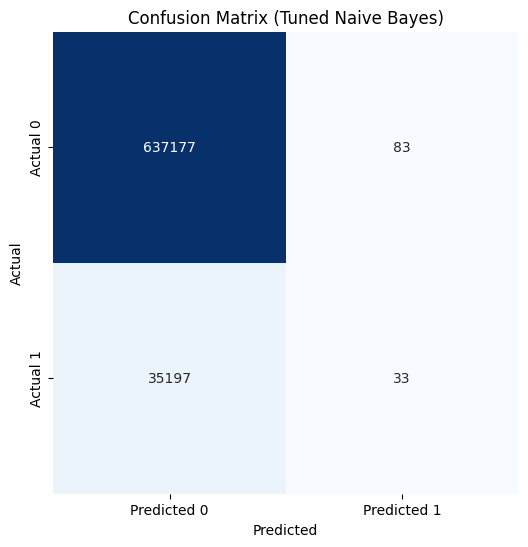

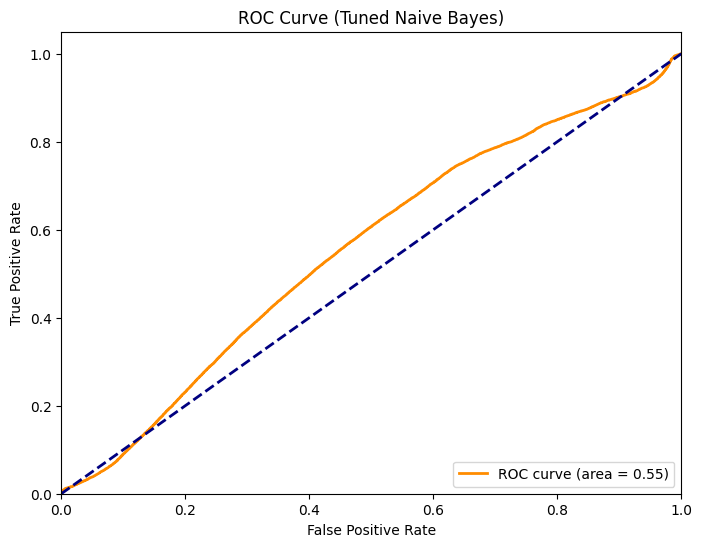

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Initialize GridSearchCV
grid_search_nb = GridSearchCV(estimator=naive_bayes, param_grid=param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_nb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_nb = grid_search_nb.best_params_
print(f"Best hyperparameters for Naive Bayes: {best_params_nb}")

# Train the model with the best hyperparameters
best_naive_bayes = GaussianNB(**best_params_nb)
best_naive_bayes.fit(X_train, y_train)
y_pred_nb_tuned = best_naive_bayes.predict(X_test)
y_prob_nb_tuned = best_naive_bayes.predict_proba(X_test)[:,1]

# Evaluate the tuned model
accuracy_nb_tuned = accuracy_score(y_test, y_pred_nb_tuned)
precision_nb_tuned = precision_score(y_test, y_pred_nb_tuned)
recall_nb_tuned = recall_score(y_test, y_pred_nb_tuned)
f1_nb_tuned = f1_score(y_test, y_pred_nb_tuned)

# Confusion Matrix
conf_matrix_nb_tuned = confusion_matrix(y_test, y_pred_nb_tuned)
TN_nb_tuned = conf_matrix_nb_tuned[0,0]
FP_nb_tuned = conf_matrix_nb_tuned[0,1]
FN_nb_tuned = conf_matrix_nb_tuned[1,0]
TP_nb_tuned = conf_matrix_nb_tuned[1,1]

# Rates
FPR_nb_tuned = FP_nb_tuned / (FP_nb_tuned + TN_nb_tuned)
TPR_nb_tuned = TP_nb_tuned / (TP_nb_tuned + FN_nb_tuned)
FNR_nb_tuned = FN_nb_tuned / (FN_nb_tuned + TP_nb_tuned)
TNR_nb_tuned = TN_nb_tuned / (TN_nb_tuned + FP_nb_tuned)

# Youden's J statistic
youden_j_nb_tuned = TPR_nb_tuned - FPR_nb_tuned

# ROC Curve
fpr_nb_tuned, tpr_nb_tuned, thresholds_nb_tuned = roc_curve(y_test, y_prob_nb_tuned)
roc_auc_nb_tuned = auc(fpr_nb_tuned, tpr_nb_tuned)

print(f"Tuned Naive Bayes - Accuracy: {accuracy_nb_tuned}")
print(f"Tuned Naive Bayes - Precision: {precision_nb_tuned}")
print(f"Tuned Naive Bayes - Recall: {recall_nb_tuned}")
print(f"Tuned Naive Bayes - F1 Score: {f1_nb_tuned}")
print(f"Tuned Naive Bayes - FPR: {FPR_nb_tuned}")
print(f"Tuned Naive Bayes - TPR: {TPR_nb_tuned}")
print(f"Tuned Naive Bayes - FNR: {FNR_nb_tuned}")
print(f"Tuned Naive Bayes - TNR: {TNR_nb_tuned}")
print(f"Tuned Naive Bayes - Youden's J: {youden_j_nb_tuned}")

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_tuned, tpr_nb_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

Tuned Naive Bayes Validation - Accuracy: 0.9749788567254835
Tuned Naive Bayes Validation - Precision: 0.08333333333333333
Tuned Naive Bayes Validation - Recall: 0.0005794861889124976
Tuned Naive Bayes Validation - F1 Score: 0.0011509687320161136
Tuned Naive Bayes Validation - FPR: 0.00016262005548793408
Tuned Naive Bayes Validation - TPR: 0.0005794861889124976
Tuned Naive Bayes Validation - FNR: 0.9994205138110875
Tuned Naive Bayes Validation - TNR: 0.999837379944512
Tuned Naive Bayes Validation - Youden's J: 0.0004168661334245635


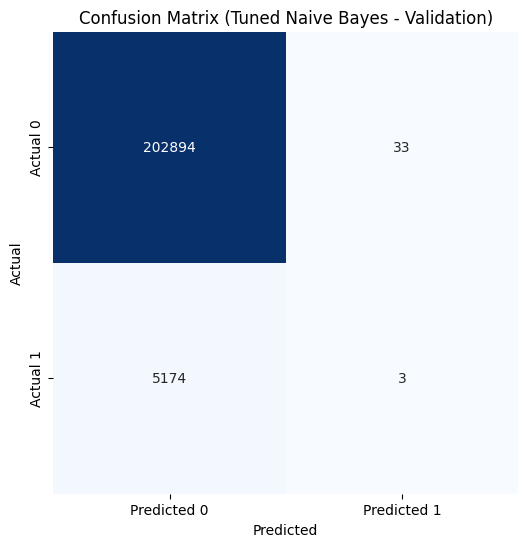

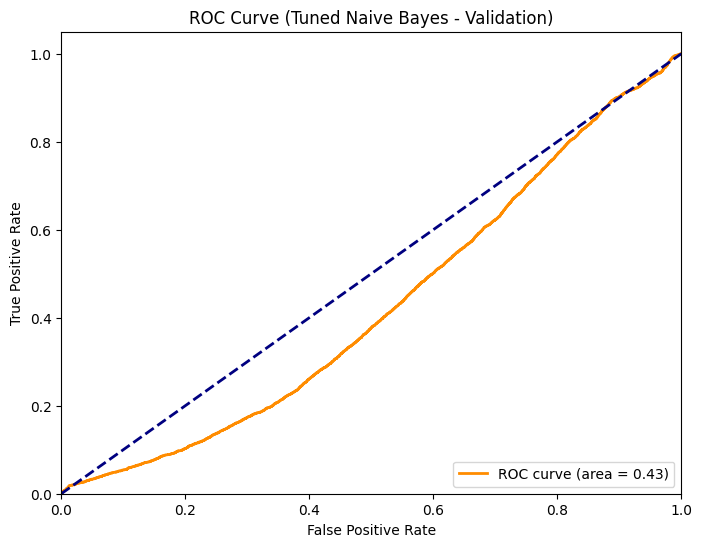

In [ ]:
y_pred_nb_tuned_val = best_naive_bayes.predict(X_val)
y_prob_nb_tuned_val = best_naive_bayes.predict_proba(X_val)[:, 1]

accuracy_nb_tuned_val = accuracy_score(y_val, y_pred_nb_tuned_val)
precision_nb_tuned_val = precision_score(y_val, y_pred_nb_tuned_val)
recall_nb_tuned_val = recall_score(y_val, y_pred_nb_tuned_val)
f1_nb_tuned_val = f1_score(y_val, y_pred_nb_tuned_val)

conf_matrix_nb_tuned_val = confusion_matrix(y_val, y_pred_nb_tuned_val)
TN_nb_tuned_val = conf_matrix_nb_tuned_val[0, 0]
FP_nb_tuned_val = conf_matrix_nb_tuned_val[0, 1]
FN_nb_tuned_val = conf_matrix_nb_tuned_val[1, 0]
TP_nb_tuned_val = conf_matrix_nb_tuned_val[1, 1]

FPR_nb_tuned_val = FP_nb_tuned_val / (FP_nb_tuned_val + TN_nb_tuned_val)
TPR_nb_tuned_val = TP_nb_tuned_val / (TP_nb_tuned_val + FN_nb_tuned_val)
FNR_nb_tuned_val = FN_nb_tuned_val / (FN_nb_tuned_val + TP_nb_tuned_val)
TNR_nb_tuned_val = TN_nb_tuned_val / (TN_nb_tuned_val + FP_nb_tuned_val)

youden_j_nb_tuned_val = TPR_nb_tuned_val - FPR_nb_tuned_val

fpr_nb_tuned_val, tpr_nb_tuned_val, thresholds_nb_tuned_val = roc_curve(y_val, y_prob_nb_tuned_val)
roc_auc_nb_tuned_val = auc(fpr_nb_tuned_val, tpr_nb_tuned_val)

print(f"Tuned Naive Bayes Validation - Accuracy: {accuracy_nb_tuned_val}")
print(f"Tuned Naive Bayes Validation - Precision: {precision_nb_tuned_val}")
print(f"Tuned Naive Bayes Validation - Recall: {recall_nb_tuned_val}")
print(f"Tuned Naive Bayes Validation - F1 Score: {f1_nb_tuned_val}")
print(f"Tuned Naive Bayes Validation - FPR: {FPR_nb_tuned_val}")
print(f"Tuned Naive Bayes Validation - TPR: {TPR_nb_tuned_val}")
print(f"Tuned Naive Bayes Validation - FNR: {FNR_nb_tuned_val}")
print(f"Tuned Naive Bayes Validation - TNR: {TNR_nb_tuned_val}")
print(f"Tuned Naive Bayes Validation - Youden's J: {youden_j_nb_tuned_val}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb_tuned_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Naive Bayes - Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_tuned_val, tpr_nb_tuned_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb_tuned_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Naive Bayes - Validation)')
plt.legend(loc="lower right")
plt.show()

####Tuned Decision Tree Model

Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned Decision Tree - Accuracy: 0.9451337566357864
Tuned Decision Tree - Precision: 0.4853435087657599
Tuned Decision Tree - Recall: 0.7834516037468067
Tuned Decision Tree - F1 Score: 0.5993767576195181
Tuned Decision Tree - FPR: 0.04592787873081631
Tuned Decision Tree - TPR: 0.7834516037468067
Tuned Decision Tree - FNR: 0.2165483962531933
Tuned Decision Tree - TNR: 0.9540721212691837
Tuned Decision Tree - Youden's J: 0.7375237250159904


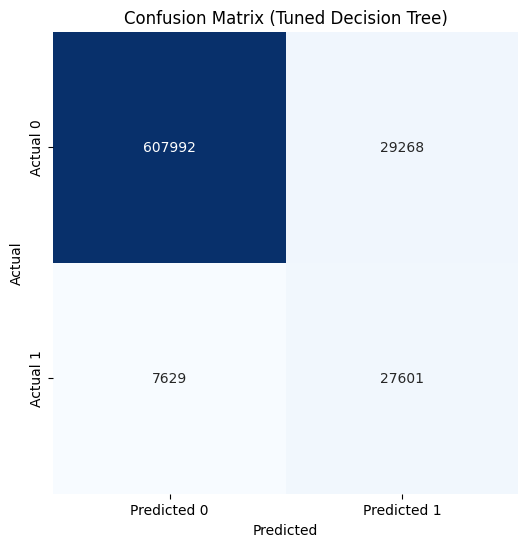

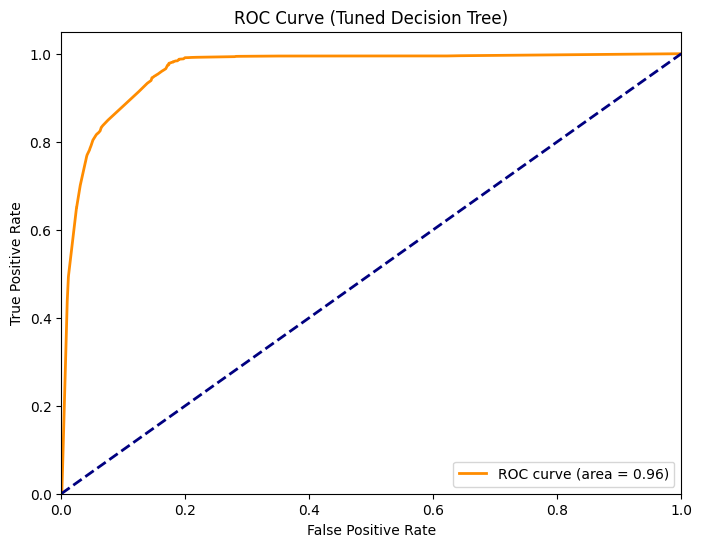

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
print(f"Best hyperparameters for Decision Tree: {best_params_dt}")

best_decision_tree = DecisionTreeClassifier(**best_params_dt)
best_decision_tree.fit(X_train, y_train)
y_pred_dt_tuned = best_decision_tree.predict(X_test)
y_prob_dt_tuned = best_decision_tree.predict_proba(X_test)[:, 1]

accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned)
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned)

conf_matrix_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
TN_dt_tuned = conf_matrix_dt_tuned[0, 0]
FP_dt_tuned = conf_matrix_dt_tuned[0, 1]
FN_dt_tuned = conf_matrix_dt_tuned[1, 0]
TP_dt_tuned = conf_matrix_dt_tuned[1, 1]

FPR_dt_tuned = FP_dt_tuned / (FP_dt_tuned + TN_dt_tuned) if (FP_dt_tuned + TN_dt_tuned) != 0 else 0
TPR_dt_tuned = TP_dt_tuned / (TP_dt_tuned + FN_dt_tuned) if (TP_dt_tuned + FN_dt_tuned) != 0 else 0
FNR_dt_tuned = FN_dt_tuned / (FN_dt_tuned + TP_dt_tuned) if (FN_dt_tuned + TP_dt_tuned) != 0 else 0
TNR_dt_tuned = TN_dt_tuned / (TN_dt_tuned + FP_dt_tuned) if (TN_dt_tuned + FP_dt_tuned) != 0 else 0

youden_j_dt_tuned = TPR_dt_tuned - FPR_dt_tuned

fpr_dt_tuned, tpr_dt_tuned, thresholds_dt_tuned = roc_curve(y_test, y_prob_dt_tuned)
roc_auc_dt_tuned = auc(fpr_dt_tuned, tpr_dt_tuned)

print(f"Tuned Decision Tree - Accuracy: {accuracy_dt_tuned}")
print(f"Tuned Decision Tree - Precision: {precision_dt_tuned}")
print(f"Tuned Decision Tree - Recall: {recall_dt_tuned}")
print(f"Tuned Decision Tree - F1 Score: {f1_dt_tuned}")
print(f"Tuned Decision Tree - FPR: {FPR_dt_tuned}")
print(f"Tuned Decision Tree - TPR: {TPR_dt_tuned}")
print(f"Tuned Decision Tree - FNR: {FNR_dt_tuned}")
print(f"Tuned Decision Tree - TNR: {TNR_dt_tuned}")
print(f"Tuned Decision Tree - Youden's J: {youden_j_dt_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dt_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_tuned, tpr_dt_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Decision Tree)')
plt.legend(loc="lower right")
plt.show()

Tuned Decision Tree Validation - Accuracy: 0.9424278245492639
Tuned Decision Tree Validation - Precision: 0.27292751301561874
Tuned Decision Tree Validation - Recall: 0.7898396754877343
Tuned Decision Tree Validation - F1 Score: 0.40567488466689816
Tuned Decision Tree Validation - FPR: 0.053679401952426244
Tuned Decision Tree Validation - TPR: 0.7898396754877343
Tuned Decision Tree Validation - FNR: 0.2101603245122658
Tuned Decision Tree Validation - TNR: 0.9463205980475737
Tuned Decision Tree Validation - Youden's J: 0.736160273535308


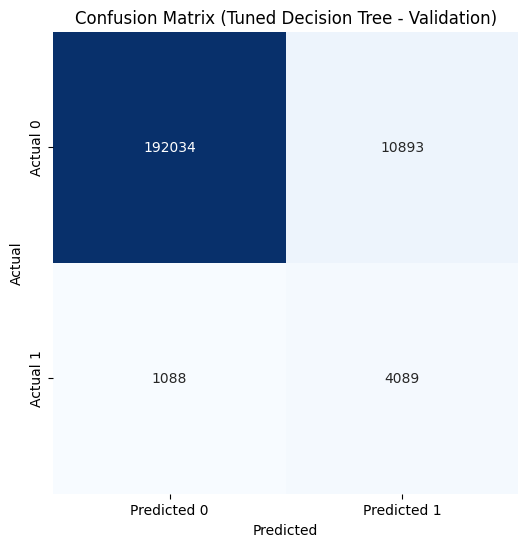

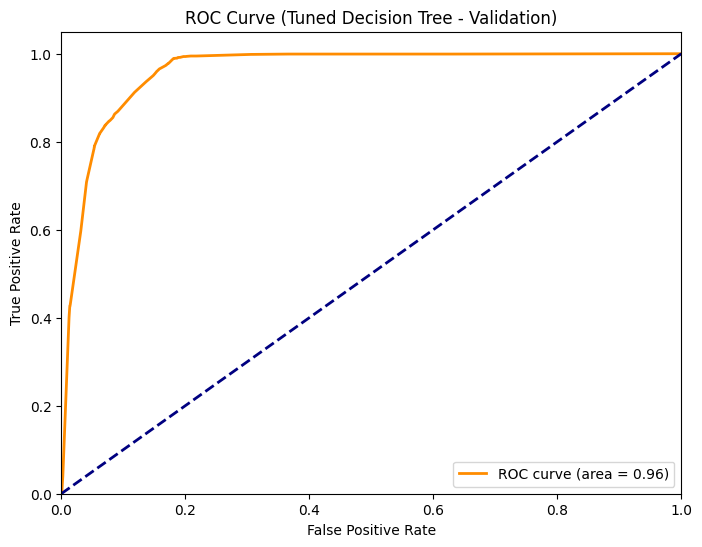

In [ ]:
y_pred_dt_tuned_val = best_decision_tree.predict(X_val)
y_prob_dt_tuned_val = best_decision_tree.predict_proba(X_val)[:, 1]

accuracy_dt_tuned_val = accuracy_score(y_val, y_pred_dt_tuned_val)
precision_dt_tuned_val = precision_score(y_val, y_pred_dt_tuned_val)
recall_dt_tuned_val = recall_score(y_val, y_pred_dt_tuned_val)
f1_dt_tuned_val = f1_score(y_val, y_pred_dt_tuned_val)

conf_matrix_dt_tuned_val = confusion_matrix(y_val, y_pred_dt_tuned_val)
TN_dt_tuned_val = conf_matrix_dt_tuned_val[0, 0]
FP_dt_tuned_val = conf_matrix_dt_tuned_val[0, 1]
FN_dt_tuned_val = conf_matrix_dt_tuned_val[1, 0]
TP_dt_tuned_val = conf_matrix_dt_tuned_val[1, 1]

FPR_dt_tuned_val = FP_dt_tuned_val / (FP_dt_tuned_val + TN_dt_tuned_val) if (FP_dt_tuned_val + TN_dt_tuned_val) != 0 else 0
TPR_dt_tuned_val = TP_dt_tuned_val / (TP_dt_tuned_val + FN_dt_tuned_val) if (TP_dt_tuned_val + FN_dt_tuned_val) != 0 else 0
FNR_dt_tuned_val = FN_dt_tuned_val / (FN_dt_tuned_val + TP_dt_tuned_val) if (FN_dt_tuned_val + TP_dt_tuned_val) != 0 else 0
TNR_dt_tuned_val = TN_dt_tuned_val / (TN_dt_tuned_val + FP_dt_tuned_val) if (TN_dt_tuned_val + FP_dt_tuned_val) != 0 else 0

youden_j_dt_tuned_val = TPR_dt_tuned_val - FPR_dt_tuned_val

fpr_dt_tuned_val, tpr_dt_tuned_val, thresholds_dt_tuned_val = roc_curve(y_val, y_prob_dt_tuned_val)
roc_auc_dt_tuned_val = auc(fpr_dt_tuned_val, tpr_dt_tuned_val)

print(f"Tuned Decision Tree Validation - Accuracy: {accuracy_dt_tuned_val}")
print(f"Tuned Decision Tree Validation - Precision: {precision_dt_tuned_val}")
print(f"Tuned Decision Tree Validation - Recall: {recall_dt_tuned_val}")
print(f"Tuned Decision Tree Validation - F1 Score: {f1_dt_tuned_val}")
print(f"Tuned Decision Tree Validation - FPR: {FPR_dt_tuned_val}")
print(f"Tuned Decision Tree Validation - TPR: {TPR_dt_tuned_val}")
print(f"Tuned Decision Tree Validation - FNR: {FNR_dt_tuned_val}")
print(f"Tuned Decision Tree Validation - TNR: {TNR_dt_tuned_val}")
print(f"Tuned Decision Tree Validation - Youden's J: {youden_j_dt_tuned_val}")

import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dt_tuned_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Decision Tree - Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_tuned_val, tpr_dt_tuned_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt_tuned_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Decision Tree - Validation)')
plt.legend(loc="lower right")
plt.show()

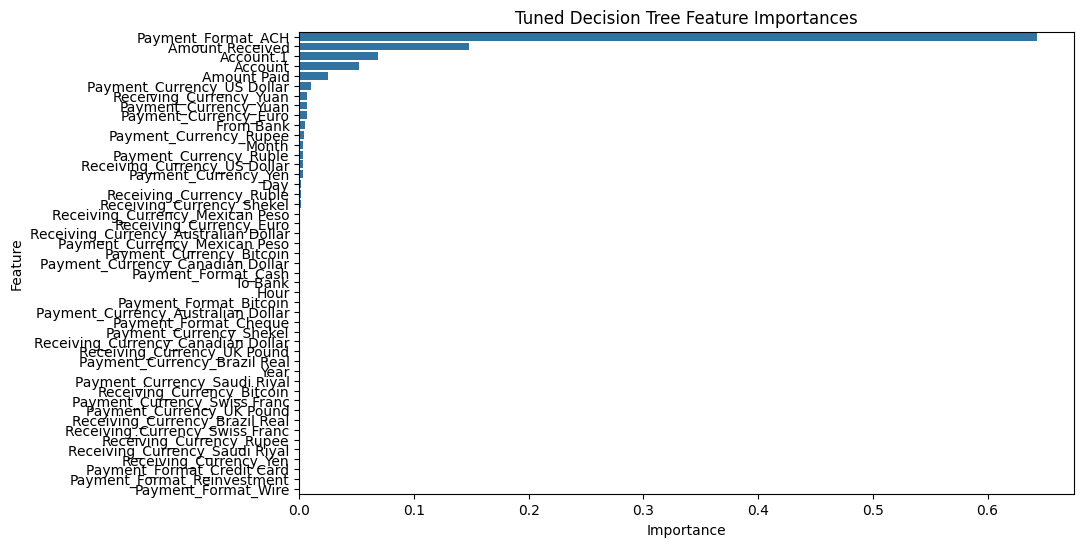

In [ ]:
feature_importances = best_decision_tree.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Tuned Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

####Tuned Random Forest Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tuned Random Forest - Accuracy: 0.9604008981546194
Tuned Random Forest - Precision: 0.5974217227785582
Tuned Random Forest - Recall: 0.748481407891002
Tuned Random Forest - F1 Score: 0.6644743473440178
Tuned Random Forest - FPR: 0.027883438470953772
Tuned Random Forest - TPR: 0.748481407891002
Tuned Random Forest - FNR: 0.251518592108998
Tuned Random Forest - TNR: 0.9721165615290462
Tuned Random Forest - Youden's J: 0.7205979694200483


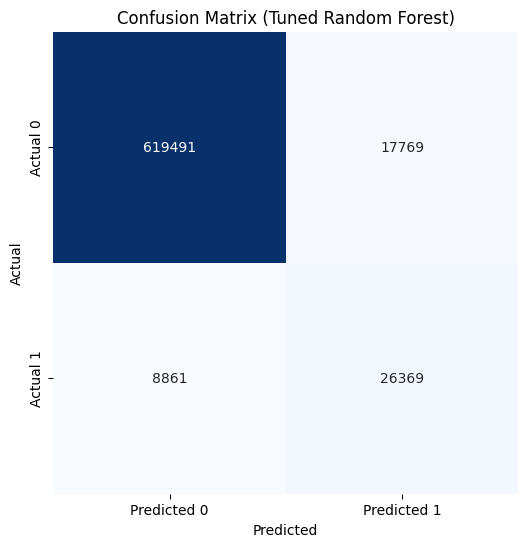

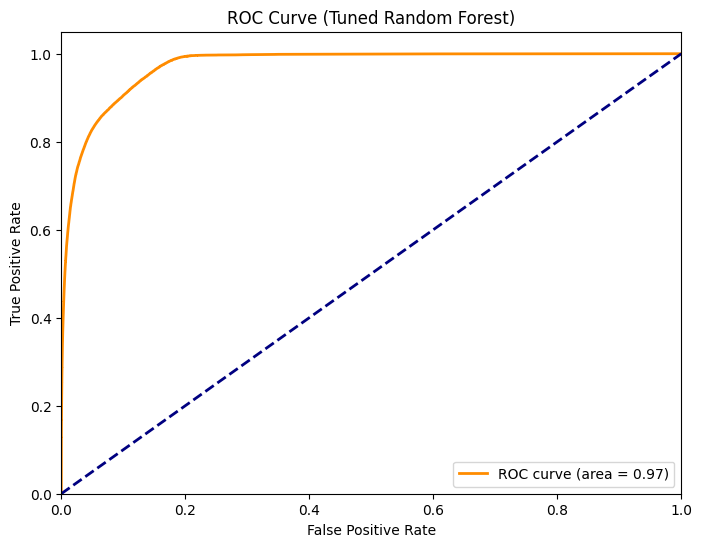

In [ ]:
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_rf}")

best_random_forest = RandomForestClassifier(**best_params_rf)
best_random_forest.fit(X_train, y_train)
y_pred_rf_tuned = best_random_forest.predict(X_test)
y_prob_rf_tuned = best_random_forest.predict_proba(X_test)[:, 1]

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)

conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
TN_rf_tuned = conf_matrix_rf_tuned[0,0]
FP_rf_tuned = conf_matrix_rf_tuned[0,1]
FN_rf_tuned = conf_matrix_rf_tuned[1,0]
TP_rf_tuned = conf_matrix_rf_tuned[1,1]

FPR_rf_tuned = FP_rf_tuned / (FP_rf_tuned + TN_rf_tuned)
TPR_rf_tuned = TP_rf_tuned / (TP_rf_tuned + FN_rf_tuned)
FNR_rf_tuned = FN_rf_tuned / (FN_rf_tuned + TP_rf_tuned)
TNR_rf_tuned = TN_rf_tuned / (TN_rf_tuned + FP_rf_tuned)

youden_j_rf_tuned = TPR_rf_tuned - FPR_rf_tuned

fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test, y_prob_rf_tuned)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

print(f"Tuned Random Forest - Accuracy: {accuracy_rf_tuned}")
print(f"Tuned Random Forest - Precision: {precision_rf_tuned}")
print(f"Tuned Random Forest - Recall: {recall_rf_tuned}")
print(f"Tuned Random Forest - F1 Score: {f1_rf_tuned}")
print(f"Tuned Random Forest - FPR: {FPR_rf_tuned}")
print(f"Tuned Random Forest - TPR: {TPR_rf_tuned}")
print(f"Tuned Random Forest - FNR: {FNR_rf_tuned}")
print(f"Tuned Random Forest - TNR: {TNR_rf_tuned}")
print(f"Tuned Random Forest - Youden's J: {youden_j_rf_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Random Forest)')
plt.legend(loc="lower right")
plt.show()

Tuned Random Forest Validation - Accuracy: 0.957377080690424
Tuned Random Forest Validation - Precision: 0.33199890819761624
Tuned Random Forest Validation - Recall: 0.7048483677805679
Tuned Random Forest Validation - F1 Score: 0.45138545274616526
Tuned Random Forest Validation - FPR: 0.036180498405830666
Tuned Random Forest Validation - TPR: 0.7048483677805679
Tuned Random Forest Validation - FNR: 0.2951516322194321
Tuned Random Forest Validation - TNR: 0.9638195015941693
Tuned Random Forest Validation - Youden's J: 0.6686678693747372


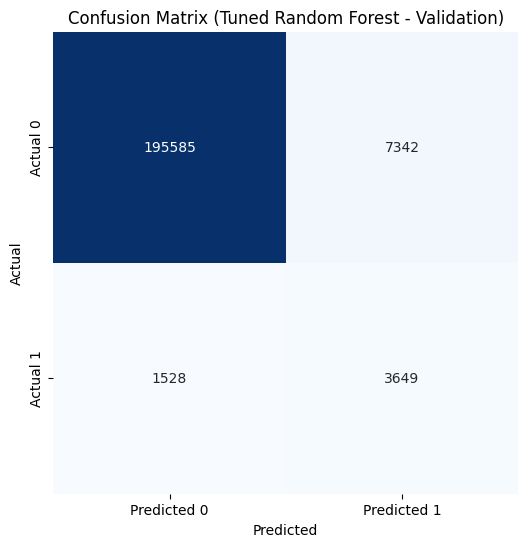

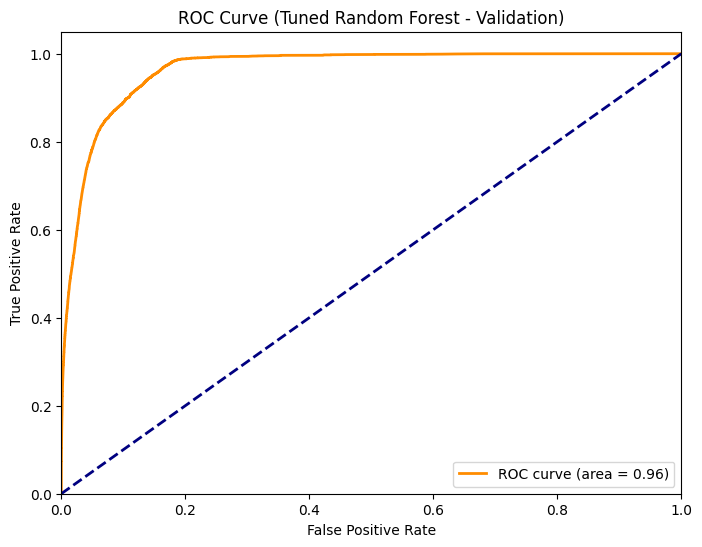

In [ ]:
y_pred_rf_tuned_val = best_random_forest.predict(X_val)
y_prob_rf_tuned_val = best_random_forest.predict_proba(X_val)[:, 1]

accuracy_rf_tuned_val = accuracy_score(y_val, y_pred_rf_tuned_val)
precision_rf_tuned_val = precision_score(y_val, y_pred_rf_tuned_val)
recall_rf_tuned_val = recall_score(y_val, y_pred_rf_tuned_val)
f1_rf_tuned_val = f1_score(y_val, y_pred_rf_tuned_val)

conf_matrix_rf_tuned_val = confusion_matrix(y_val, y_pred_rf_tuned_val)
TN_rf_tuned_val = conf_matrix_rf_tuned_val[0, 0]
FP_rf_tuned_val = conf_matrix_rf_tuned_val[0, 1]
FN_rf_tuned_val = conf_matrix_rf_tuned_val[1, 0]
TP_rf_tuned_val = conf_matrix_rf_tuned_val[1, 1]

FPR_rf_tuned_val = FP_rf_tuned_val / (FP_rf_tuned_val + TN_rf_tuned_val) if (FP_rf_tuned_val + TN_rf_tuned_val) != 0 else 0
TPR_rf_tuned_val = TP_rf_tuned_val / (TP_rf_tuned_val + FN_rf_tuned_val) if (TP_rf_tuned_val + FN_rf_tuned_val) != 0 else 0
FNR_rf_tuned_val = FN_rf_tuned_val / (FN_rf_tuned_val + TP_rf_tuned_val) if (FN_rf_tuned_val + TP_rf_tuned_val) != 0 else 0
TNR_rf_tuned_val = TN_rf_tuned_val / (TN_rf_tuned_val + FP_rf_tuned_val) if (TN_rf_tuned_val + FP_rf_tuned_val) != 0 else 0

youden_j_rf_tuned_val = TPR_rf_tuned_val - FPR_rf_tuned_val

fpr_rf_tuned_val, tpr_rf_tuned_val, thresholds_rf_tuned_val = roc_curve(y_val, y_prob_rf_tuned_val)
roc_auc_rf_tuned_val = auc(fpr_rf_tuned_val, tpr_rf_tuned_val)

print(f"Tuned Random Forest Validation - Accuracy: {accuracy_rf_tuned_val}")
print(f"Tuned Random Forest Validation - Precision: {precision_rf_tuned_val}")
print(f"Tuned Random Forest Validation - Recall: {recall_rf_tuned_val}")
print(f"Tuned Random Forest Validation - F1 Score: {f1_rf_tuned_val}")
print(f"Tuned Random Forest Validation - FPR: {FPR_rf_tuned_val}")
print(f"Tuned Random Forest Validation - TPR: {TPR_rf_tuned_val}")
print(f"Tuned Random Forest Validation - FNR: {FNR_rf_tuned_val}")
print(f"Tuned Random Forest Validation - TNR: {TNR_rf_tuned_val}")
print(f"Tuned Random Forest Validation - Youden's J: {youden_j_rf_tuned_val}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf_tuned_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Random Forest - Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned_val, tpr_rf_tuned_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_tuned_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Random Forest - Validation)')
plt.legend(loc="lower right")
plt.show()

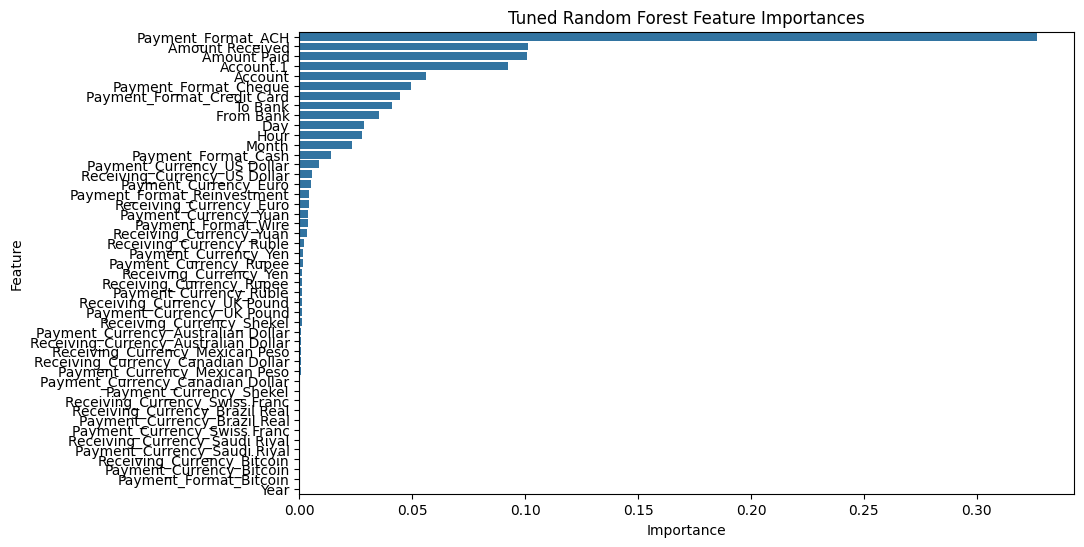

In [ ]:
feature_importances = best_random_forest.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Tuned Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

####Tuned Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Tuned Logistic Regression - Accuracy: 0.9031539502446133
Tuned Logistic Regression - Precision: 0.3269511263399162
Tuned Logistic Regression - Recall: 0.8017030939540165
Tuned Logistic Regression - F1 Score: 0.4644783581107749
Tuned Logistic Regression - FPR: 0.09123748548473151
Tuned Logistic Regression - TPR: 0.8017030939540165
Tuned Logistic Regression - FNR: 0.19829690604598355
Tuned Logistic Regression - TNR: 0.9087625145152685
Tuned Logistic Regression - Youden's J: 0.710465608469285


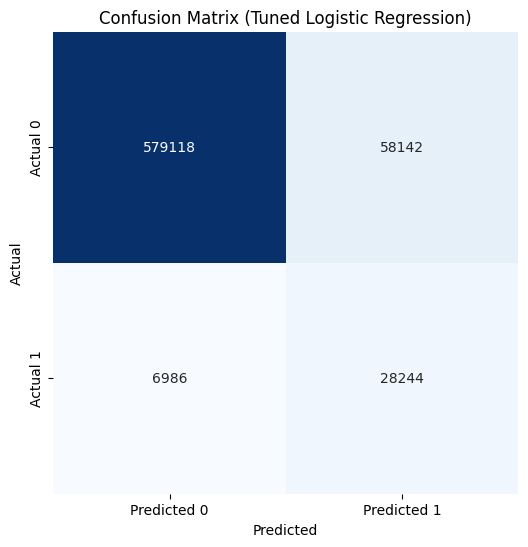

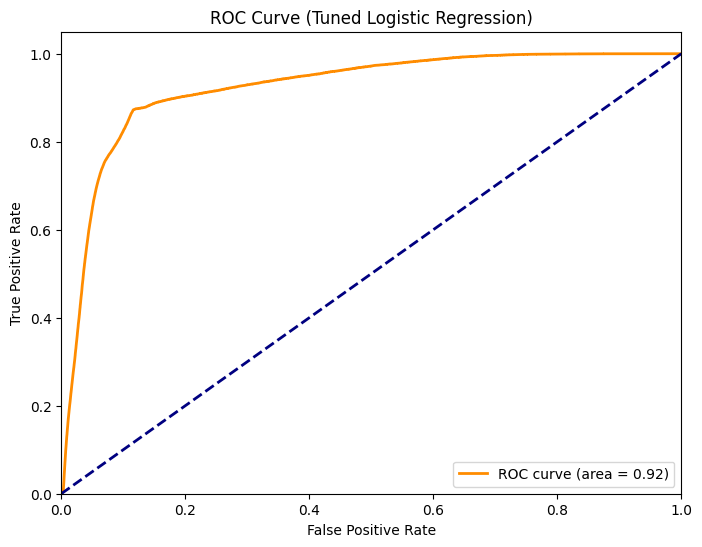

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search_lr = RandomizedSearchCV( estimator=LogisticRegression(),
                                      param_distributions=param_distributions_lr,
                                      n_iter=10,
                                      cv=5, scoring='accuracy', n_jobs=-1,
                                      random_state=42 )

random_search_lr.fit(X_train, y_train)

best_params_lr = random_search_lr.best_params_
print(f"Best hyperparameters for Logistic Regression: {best_params_lr}")

best_logistic_regression = LogisticRegression(**best_params_lr)
best_logistic_regression.fit(X_train, y_train)
y_pred_lr_tuned = best_logistic_regression.predict(X_test)
y_prob_lr_tuned = best_logistic_regression.predict_proba(X_test)[:, 1]

accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
precision_lr_tuned = precision_score(y_test, y_pred_lr_tuned)
recall_lr_tuned = recall_score(y_test, y_pred_lr_tuned)
f1_lr_tuned = f1_score(y_test, y_pred_lr_tuned)

conf_matrix_lr_tuned = confusion_matrix(y_test, y_pred_lr_tuned)
TN_lr_tuned = conf_matrix_lr_tuned[0,0]
FP_lr_tuned = conf_matrix_lr_tuned[0,1]
FN_lr_tuned = conf_matrix_lr_tuned[1,0]
TP_lr_tuned = conf_matrix_lr_tuned[1,1]

FPR_lr_tuned = FP_lr_tuned / (FP_lr_tuned + TN_lr_tuned)
TPR_lr_tuned = TP_lr_tuned / (TP_lr_tuned + FN_lr_tuned)
FNR_lr_tuned = FN_lr_tuned / (FN_lr_tuned + TP_lr_tuned)
TNR_lr_tuned = TN_lr_tuned / (TN_lr_tuned + FP_lr_tuned)

youden_j_lr_tuned = TPR_lr_tuned - FPR_lr_tuned

fpr_lr_tuned, tpr_lr_tuned, thresholds_lr_tuned = roc_curve(y_test, y_prob_lr_tuned)
roc_auc_lr_tuned = auc(fpr_lr_tuned, tpr_lr_tuned)

print(f"Tuned Logistic Regression - Accuracy: {accuracy_lr_tuned}")
print(f"Tuned Logistic Regression - Precision: {precision_lr_tuned}")
print(f"Tuned Logistic Regression - Recall: {recall_lr_tuned}")
print(f"Tuned Logistic Regression - F1 Score: {f1_lr_tuned}")
print(f"Tuned Logistic Regression - FPR: {FPR_lr_tuned}")
print(f"Tuned Logistic Regression - TPR: {TPR_lr_tuned}")
print(f"Tuned Logistic Regression - FNR: {FNR_lr_tuned}")
print(f"Tuned Logistic Regression - TNR: {TNR_lr_tuned}")
print(f"Tuned Logistic Regression - Youden's J: {youden_j_lr_tuned}")

import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lr_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_tuned, tpr_lr_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

Tuned Logistic Regression Validation - Accuracy: 0.88605216622458
Tuned Logistic Regression Validation - Precision: 0.16300632681259544
Tuned Logistic Regression Validation - Recall: 0.8659455282982422
Tuned Logistic Regression Validation - F1 Score: 0.2743658006670951
Tuned Logistic Regression Validation - FPR: 0.11343488052353802
Tuned Logistic Regression Validation - TPR: 0.8659455282982422
Tuned Logistic Regression Validation - FNR: 0.13405447170175777
Tuned Logistic Regression Validation - TNR: 0.886565119476462
Tuned Logistic Regression Validation - Youden's J: 0.7525106477747042


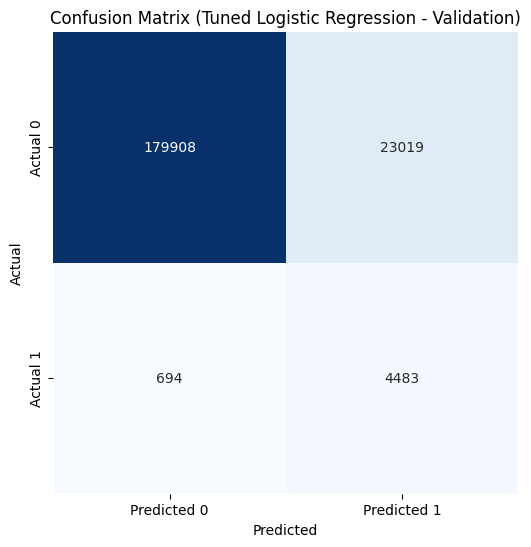

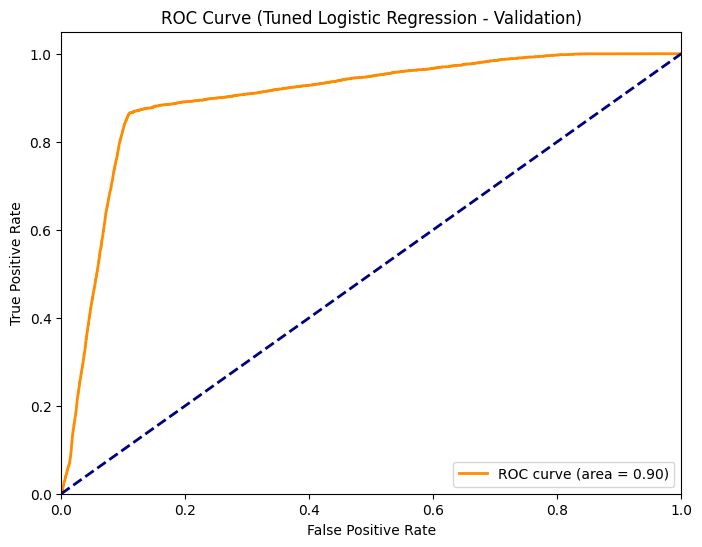

In [ ]:
y_pred_lr_tuned_val = best_logistic_regression.predict(X_val)
y_prob_lr_tuned_val = best_logistic_regression.predict_proba(X_val)[:, 1]

accuracy_lr_tuned_val = accuracy_score(y_val, y_pred_lr_tuned_val)
precision_lr_tuned_val = precision_score(y_val, y_pred_lr_tuned_val)
recall_lr_tuned_val = recall_score(y_val, y_pred_lr_tuned_val)
f1_lr_tuned_val = f1_score(y_val, y_pred_lr_tuned_val)

conf_matrix_lr_tuned_val = confusion_matrix(y_val, y_pred_lr_tuned_val)
TN_lr_tuned_val = conf_matrix_lr_tuned_val[0, 0]
FP_lr_tuned_val = conf_matrix_lr_tuned_val[0, 1]
FN_lr_tuned_val = conf_matrix_lr_tuned_val[1, 0]
TP_lr_tuned_val = conf_matrix_lr_tuned_val[1, 1]

FPR_lr_tuned_val = FP_lr_tuned_val / (FP_lr_tuned_val + TN_lr_tuned_val) if (FP_lr_tuned_val + TN_lr_tuned_val) != 0 else 0
TPR_lr_tuned_val = TP_lr_tuned_val / (TP_lr_tuned_val + FN_lr_tuned_val) if (TP_lr_tuned_val + FN_lr_tuned_val) != 0 else 0
FNR_lr_tuned_val = FN_lr_tuned_val / (FN_lr_tuned_val + TP_lr_tuned_val) if (FN_lr_tuned_val + TP_lr_tuned_val) != 0 else 0
TNR_lr_tuned_val = TN_lr_tuned_val / (TN_lr_tuned_val + FP_lr_tuned_val) if (TN_lr_tuned_val + FP_lr_tuned_val) != 0 else 0

youden_j_lr_tuned_val = TPR_lr_tuned_val - FPR_lr_tuned_val

fpr_lr_tuned_val, tpr_lr_tuned_val, thresholds_lr_tuned_val = roc_curve(y_val, y_prob_lr_tuned_val)
roc_auc_lr_tuned_val = auc(fpr_lr_tuned_val, tpr_lr_tuned_val)

print(f"Tuned Logistic Regression Validation - Accuracy: {accuracy_lr_tuned_val}")
print(f"Tuned Logistic Regression Validation - Precision: {precision_lr_tuned_val}")
print(f"Tuned Logistic Regression Validation - Recall: {recall_lr_tuned_val}")
print(f"Tuned Logistic Regression Validation - F1 Score: {f1_lr_tuned_val}")
print(f"Tuned Logistic Regression Validation - FPR: {FPR_lr_tuned_val}")
print(f"Tuned Logistic Regression Validation - TPR: {TPR_lr_tuned_val}")
print(f"Tuned Logistic Regression Validation - FNR: {FNR_lr_tuned_val}")
print(f"Tuned Logistic Regression Validation - TNR: {TNR_lr_tuned_val}")
print(f"Tuned Logistic Regression Validation - Youden's J: {youden_j_lr_tuned_val}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lr_tuned_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Logistic Regression - Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_tuned_val, tpr_lr_tuned_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr_tuned_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Logistic Regression - Validation)')
plt.legend(loc="lower right")
plt.show()

####Tuned Gradient Boost Model

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters for Gradient Boosting: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.2}


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuned Gradient Boosting - Accuracy: 0.9522624871745304
Tuned Gradient Boosting - Precision: 0.5305293577802511
Tuned Gradient Boosting - Recall: 0.7712177121771218
Tuned Gradient Boosting - F1 Score: 0.6286223291648833
Tuned Gradient Boosting - FPR: 0.037728713554906944
Tuned Gradient Boosting - TPR: 0.7712177121771218
Tuned Gradient Boosting - FNR: 0.22878228782287824
Tuned Gradient Boosting - TNR: 0.9622712864450931
Tuned Gradient Boosting - Youden's J: 0.7334889986222148


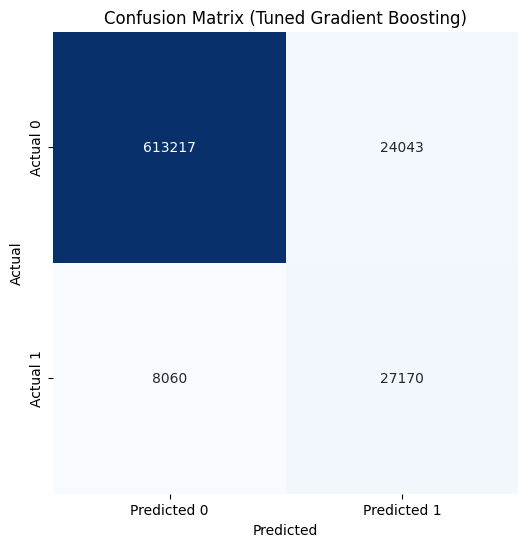

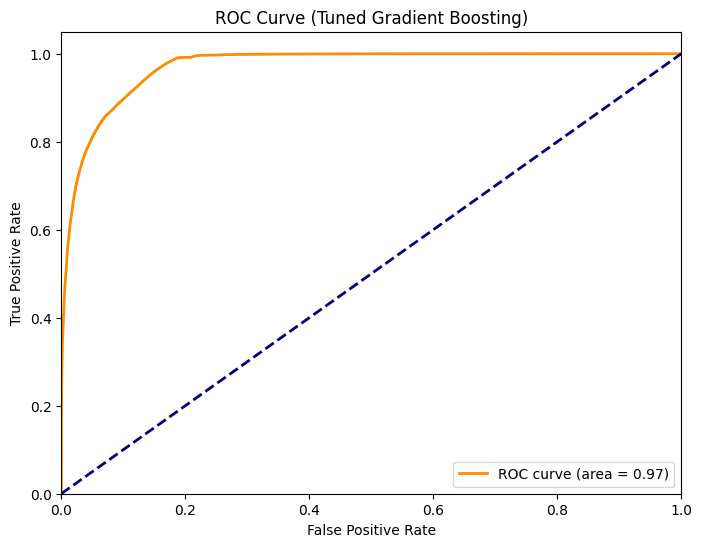

In [ ]:
param_distributions_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2] }
random_search_gb = RandomizedSearchCV( estimator=GradientBoostingClassifier(), param_distributions=param_distributions_gb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search_gb.fit(X_train, y_train)

best_params_gb = random_search_gb.best_params_
print(f"Best hyperparameters for Gradient Boosting: {best_params_gb}")

best_gradient_boosting = GradientBoostingClassifier(**best_params_gb)
best_gradient_boosting.fit(X_train, y_train)
y_pred_gb_tuned = best_gradient_boosting.predict(X_test)
y_prob_gb_tuned = best_gradient_boosting.predict_proba(X_test)[:, 1]

accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
precision_gb_tuned = precision_score(y_test, y_pred_gb_tuned)
recall_gb_tuned = recall_score(y_test, y_pred_gb_tuned)
f1_gb_tuned = f1_score(y_test, y_pred_gb_tuned)

conf_matrix_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)
TN_gb_tuned = conf_matrix_gb_tuned[0, 0]
FP_gb_tuned = conf_matrix_gb_tuned[0, 1]
FN_gb_tuned = conf_matrix_gb_tuned[1, 0]
TP_gb_tuned = conf_matrix_gb_tuned[1, 1]

FPR_gb_tuned = FP_gb_tuned / (FP_gb_tuned + TN_gb_tuned) if (FP_gb_tuned + TN_gb_tuned) != 0 else 0
TPR_gb_tuned = TP_gb_tuned / (TP_gb_tuned + FN_gb_tuned) if (TP_gb_tuned + FN_gb_tuned) != 0 else 0
FNR_gb_tuned = FN_gb_tuned / (FN_gb_tuned + TP_gb_tuned) if (FN_gb_tuned + TP_gb_tuned) != 0 else 0
TNR_gb_tuned = TN_gb_tuned / (TN_gb_tuned + FP_gb_tuned) if (TN_gb_tuned + FP_gb_tuned) != 0 else 0

youden_j_gb_tuned = TPR_gb_tuned - FPR_gb_tuned

fpr_gb_tuned, tpr_gb_tuned, thresholds_gb_tuned = roc_curve(y_test, y_prob_gb_tuned)
roc_auc_gb_tuned = auc(fpr_gb_tuned, tpr_gb_tuned)

print(f"Tuned Gradient Boosting - Accuracy: {accuracy_gb_tuned}")
print(f"Tuned Gradient Boosting - Precision: {precision_gb_tuned}")
print(f"Tuned Gradient Boosting - Recall: {recall_gb_tuned}")
print(f"Tuned Gradient Boosting - F1 Score: {f1_gb_tuned}")
print(f"Tuned Gradient Boosting - FPR: {FPR_gb_tuned}")
print(f"Tuned Gradient Boosting - TPR: {TPR_gb_tuned}")
print(f"Tuned Gradient Boosting - FNR: {FNR_gb_tuned}")
print(f"Tuned Gradient Boosting - TNR: {TNR_gb_tuned}")
print(f"Tuned Gradient Boosting - Youden's J: {youden_j_gb_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_gb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_tuned, tpr_gb_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()

Tuned Gradient Boosting Validation - Accuracy: 0.9456473686233806
Tuned Gradient Boosting Validation - Precision: 0.28674732304269224
Tuned Gradient Boosting Validation - Recall: 0.7966003476917134
Tuned Gradient Boosting Validation - F1 Score: 0.42169845084104507
Tuned Gradient Boosting Validation - FPR: 0.05055019785440085
Tuned Gradient Boosting Validation - TPR: 0.7966003476917134
Tuned Gradient Boosting Validation - FNR: 0.20339965230828666
Tuned Gradient Boosting Validation - TNR: 0.9494498021455992
Tuned Gradient Boosting Validation - Youden's J: 0.7460501498373125


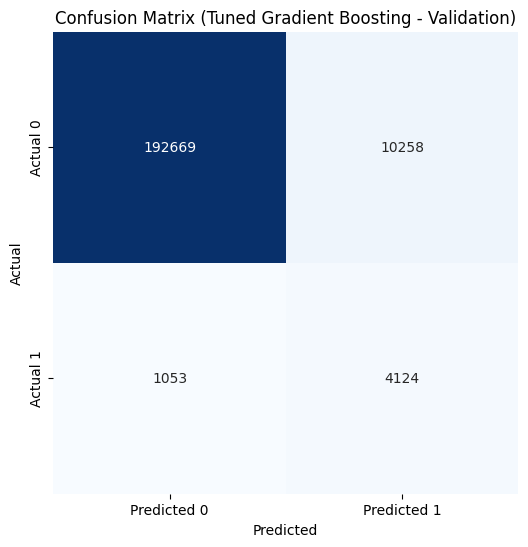

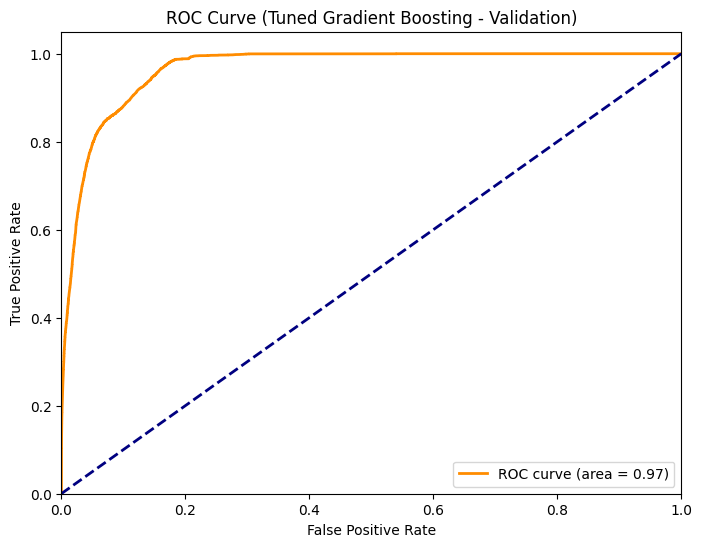

In [ ]:
y_pred_gb_tuned_val = best_gradient_boosting.predict(X_val)
y_prob_gb_tuned_val = best_gradient_boosting.predict_proba(X_val)[:, 1]

accuracy_gb_tuned_val = accuracy_score(y_val, y_pred_gb_tuned_val)
precision_gb_tuned_val = precision_score(y_val, y_pred_gb_tuned_val)
recall_gb_tuned_val = recall_score(y_val, y_pred_gb_tuned_val)
f1_gb_tuned_val = f1_score(y_val, y_pred_gb_tuned_val)

conf_matrix_gb_tuned_val = confusion_matrix(y_val, y_pred_gb_tuned_val)
TN_gb_tuned_val = conf_matrix_gb_tuned_val[0, 0]
FP_gb_tuned_val = conf_matrix_gb_tuned_val[0, 1]
FN_gb_tuned_val = conf_matrix_gb_tuned_val[1, 0]
TP_gb_tuned_val = conf_matrix_gb_tuned_val[1, 1]

FPR_gb_tuned_val = FP_gb_tuned_val / (FP_gb_tuned_val + TN_gb_tuned_val) if (FP_gb_tuned_val + TN_gb_tuned_val) != 0 else 0
TPR_gb_tuned_val = TP_gb_tuned_val / (TP_gb_tuned_val + FN_gb_tuned_val) if (TP_gb_tuned_val + FN_gb_tuned_val) != 0 else 0
FNR_gb_tuned_val = FN_gb_tuned_val / (FN_gb_tuned_val + TP_gb_tuned_val) if (FN_gb_tuned_val + TP_gb_tuned_val) != 0 else 0
TNR_gb_tuned_val = TN_gb_tuned_val / (TN_gb_tuned_val + FP_gb_tuned_val) if (TN_gb_tuned_val + FP_gb_tuned_val) != 0 else 0

youden_j_gb_tuned_val = TPR_gb_tuned_val - FPR_gb_tuned_val

fpr_gb_tuned_val, tpr_gb_tuned_val, thresholds_gb_tuned_val = roc_curve(y_val, y_prob_gb_tuned_val)
roc_auc_gb_tuned_val = auc(fpr_gb_tuned_val, tpr_gb_tuned_val)

print(f"Tuned Gradient Boosting Validation - Accuracy: {accuracy_gb_tuned_val}")
print(f"Tuned Gradient Boosting Validation - Precision: {precision_gb_tuned_val}")
print(f"Tuned Gradient Boosting Validation - Recall: {recall_gb_tuned_val}")
print(f"Tuned Gradient Boosting Validation - F1 Score: {f1_gb_tuned_val}")
print(f"Tuned Gradient Boosting Validation - FPR: {FPR_gb_tuned_val}")
print(f"Tuned Gradient Boosting Validation - TPR: {TPR_gb_tuned_val}")
print(f"Tuned Gradient Boosting Validation - FNR: {FNR_gb_tuned_val}")
print(f"Tuned Gradient Boosting Validation - TNR: {TNR_gb_tuned_val}")
print(f"Tuned Gradient Boosting Validation - Youden's J: {youden_j_gb_tuned_val}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_gb_tuned_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Gradient Boosting - Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_tuned_val, tpr_gb_tuned_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb_tuned_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Gradient Boosting - Validation)')
plt.legend(loc="lower right")
plt.show()

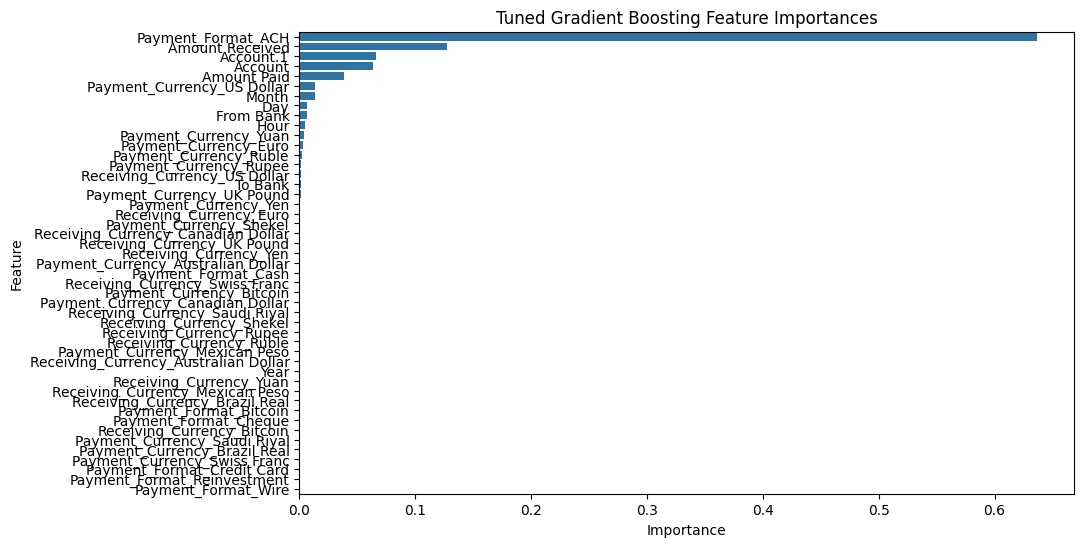

In [ ]:
feature_importances = best_gradient_boosting.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Tuned Gradient Boosting Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

####Tuned XGBoost Model

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters for XGBoost: {'subsample': 0.9, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.5, 'colsample_bytree': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuned XGBoost - Accuracy: 0.9562209103481093
Tuned XGBoost - Precision: 0.5596570415713432
Tuned XGBoost - Recall: 0.770763553789384
Tuned XGBoost - F1 Score: 0.6484614741668557
Tuned XGBoost - FPR: 0.03352634717383799
Tuned XGBoost - TPR: 0.770763553789384
Tuned XGBoost - FNR: 0.22923644621061595
Tuned XGBoost - TNR: 0.966473652826162
Tuned XGBoost - Youden's J: 0.737237206615546


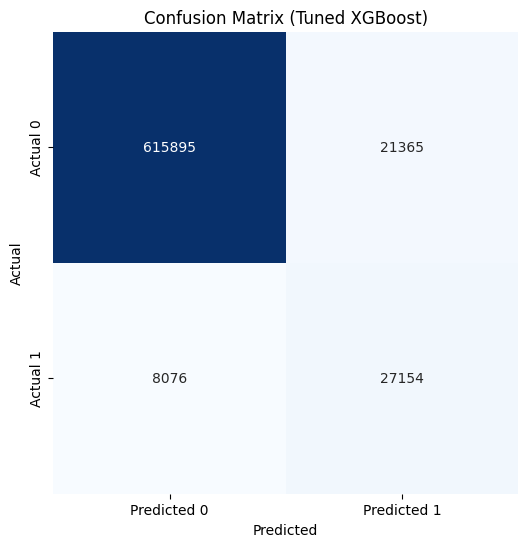

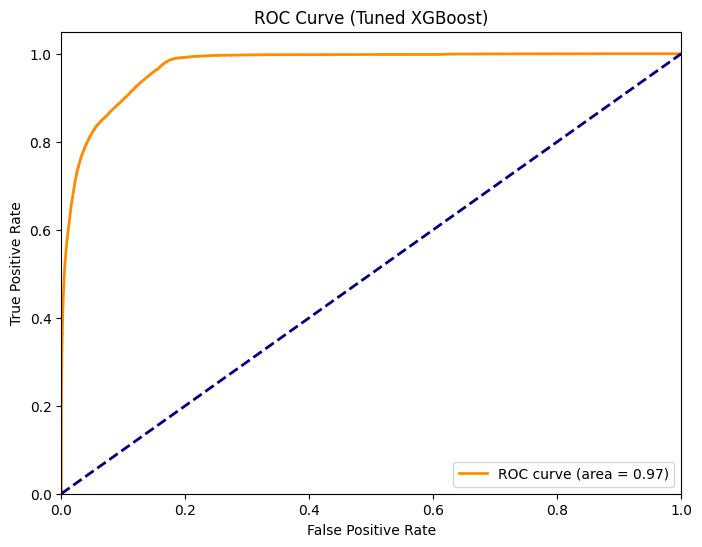

In [ ]:
param_distributions_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

random_search_xgb = RandomizedSearchCV( estimator=xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='logloss'), param_distributions=param_distributions_xgb, n_iter=20,
                                        cv=5, scoring='accuracy', n_jobs=-1, random_state=42 )

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")

best_xgboost = xgb.XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')
best_xgboost.fit(X_train, y_train)
y_pred_xgb_tuned = best_xgboost.predict(X_test)
y_prob_xgb_tuned = best_xgboost.predict_proba(X_test)[:, 1]

accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_pred_xgb_tuned)

conf_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
TN_xgb_tuned = conf_matrix_xgb_tuned[0, 0]
FP_xgb_tuned = conf_matrix_xgb_tuned[0, 1]
FN_xgb_tuned = conf_matrix_xgb_tuned[1, 0]
TP_xgb_tuned = conf_matrix_xgb_tuned[1, 1]

FPR_xgb_tuned = FP_xgb_tuned / (FP_xgb_tuned + TN_xgb_tuned) if (FP_xgb_tuned + TN_xgb_tuned) != 0 else 0
TPR_xgb_tuned = TP_xgb_tuned / (TP_xgb_tuned + FN_xgb_tuned) if (TP_xgb_tuned + FN_xgb_tuned) != 0 else 0
FNR_xgb_tuned = FN_xgb_tuned / (FN_xgb_tuned + TP_xgb_tuned) if (FN_xgb_tuned + TP_xgb_tuned) != 0 else 0
TNR_xgb_tuned = TN_xgb_tuned / (TN_xgb_tuned + FP_xgb_tuned) if (TN_xgb_tuned + FP_xgb_tuned) != 0 else 0

youden_j_xgb_tuned = TPR_xgb_tuned - FPR_xgb_tuned

fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test, y_prob_xgb_tuned)
roc_auc_xgb_tuned = auc(fpr_xgb_tuned, tpr_xgb_tuned)

print(f"Tuned XGBoost - Accuracy: {accuracy_xgb_tuned}")
print(f"Tuned XGBoost - Precision: {precision_xgb_tuned}")
print(f"Tuned XGBoost - Recall: {recall_xgb_tuned}")
print(f"Tuned XGBoost - F1 Score: {f1_xgb_tuned}")
print(f"Tuned XGBoost - FPR: {FPR_xgb_tuned}")
print(f"Tuned XGBoost - TPR: {TPR_xgb_tuned}")
print(f"Tuned XGBoost - FNR: {FNR_xgb_tuned}")
print(f"Tuned XGBoost - TNR: {TNR_xgb_tuned}")
print(f"Tuned XGBoost - Youden's J: {youden_j_xgb_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned XGBoost)')
plt.legend(loc="lower right")
plt.show()

Tuned XGBoost Validation - Accuracy: 0.9547437819551763
Tuned XGBoost Validation - Precision: 0.3226561846617044
Tuned XGBoost Validation - Recall: 0.7452192389414719
Tuned XGBoost Validation - F1 Score: 0.4503326718804716
Tuned XGBoost Validation - FPR: 0.03991090392111449
Tuned XGBoost Validation - TPR: 0.7452192389414719
Tuned XGBoost Validation - FNR: 0.2547807610585281
Tuned XGBoost Validation - TNR: 0.9600890960788855
Tuned XGBoost Validation - Youden's J: 0.7053083350203574


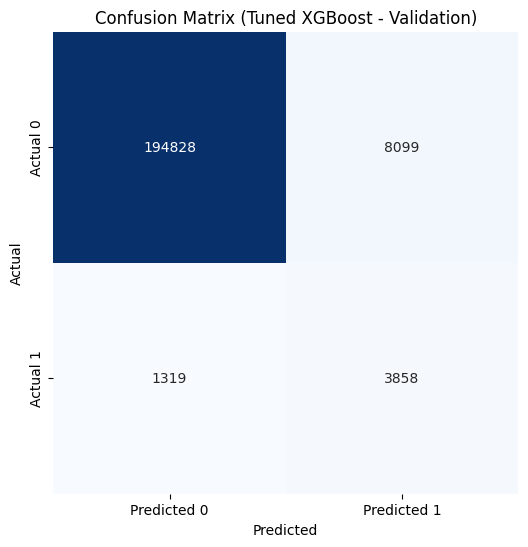

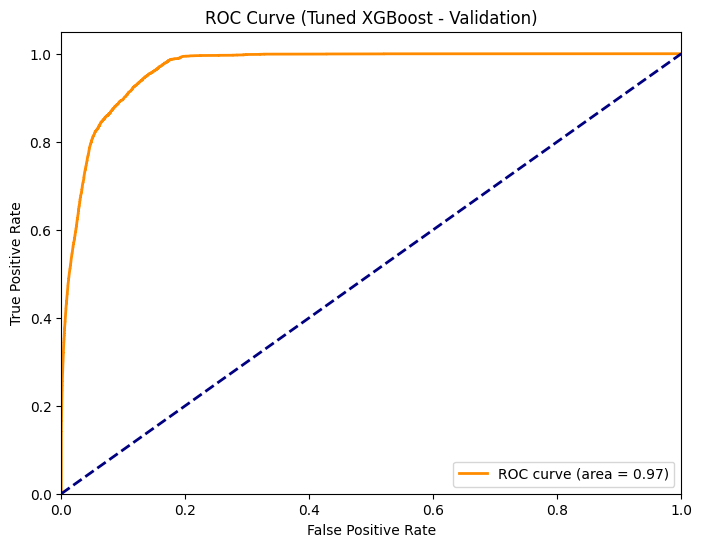

In [ ]:
y_pred_xgb_tuned_val = best_xgboost.predict(X_val)
y_prob_xgb_tuned_val = best_xgboost.predict_proba(X_val)[:, 1]

accuracy_xgb_tuned_val = accuracy_score(y_val, y_pred_xgb_tuned_val)
precision_xgb_tuned_val = precision_score(y_val, y_pred_xgb_tuned_val)
recall_xgb_tuned_val = recall_score(y_val, y_pred_xgb_tuned_val)
f1_xgb_tuned_val = f1_score(y_val, y_pred_xgb_tuned_val)

conf_matrix_xgb_tuned_val = confusion_matrix(y_val, y_pred_xgb_tuned_val)
TN_xgb_tuned_val = conf_matrix_xgb_tuned_val[0, 0]
FP_xgb_tuned_val = conf_matrix_xgb_tuned_val[0, 1]
FN_xgb_tuned_val = conf_matrix_xgb_tuned_val[1, 0]
TP_xgb_tuned_val = conf_matrix_xgb_tuned_val[1, 1]

FPR_xgb_tuned_val = FP_xgb_tuned_val / (FP_xgb_tuned_val + TN_xgb_tuned_val) if (FP_xgb_tuned_val + TN_xgb_tuned_val) != 0 else 0
TPR_xgb_tuned_val = TP_xgb_tuned_val / (TP_xgb_tuned_val + FN_xgb_tuned_val) if (TP_xgb_tuned_val + FN_xgb_tuned_val) != 0 else 0
FNR_xgb_tuned_val = FN_xgb_tuned_val / (FN_xgb_tuned_val + TP_xgb_tuned_val) if (FN_xgb_tuned_val + TP_xgb_tuned_val) != 0 else 0
TNR_xgb_tuned_val = TN_xgb_tuned_val / (TN_xgb_tuned_val + FP_xgb_tuned_val) if (TN_xgb_tuned_val + FP_xgb_tuned_val) != 0 else 0

youden_j_xgb_tuned_val = TPR_xgb_tuned_val - FPR_xgb_tuned_val

fpr_xgb_tuned_val, tpr_xgb_tuned_val, thresholds_xgb_tuned_val = roc_curve(y_val, y_prob_xgb_tuned_val)
roc_auc_xgb_tuned_val = auc(fpr_xgb_tuned_val, tpr_xgb_tuned_val)

print(f"Tuned XGBoost Validation - Accuracy: {accuracy_xgb_tuned_val}")
print(f"Tuned XGBoost Validation - Precision: {precision_xgb_tuned_val}")
print(f"Tuned XGBoost Validation - Recall: {recall_xgb_tuned_val}")
print(f"Tuned XGBoost Validation - F1 Score: {f1_xgb_tuned_val}")
print(f"Tuned XGBoost Validation - FPR: {FPR_xgb_tuned_val}")
print(f"Tuned XGBoost Validation - TPR: {TPR_xgb_tuned_val}")
print(f"Tuned XGBoost Validation - FNR: {FNR_xgb_tuned_val}")
print(f"Tuned XGBoost Validation - TNR: {TNR_xgb_tuned_val}")
print(f"Tuned XGBoost Validation - Youden's J: {youden_j_xgb_tuned_val}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_xgb_tuned_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned XGBoost - Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned_val, tpr_xgb_tuned_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb_tuned_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned XGBoost - Validation)')
plt.legend(loc="lower right")
plt.show()


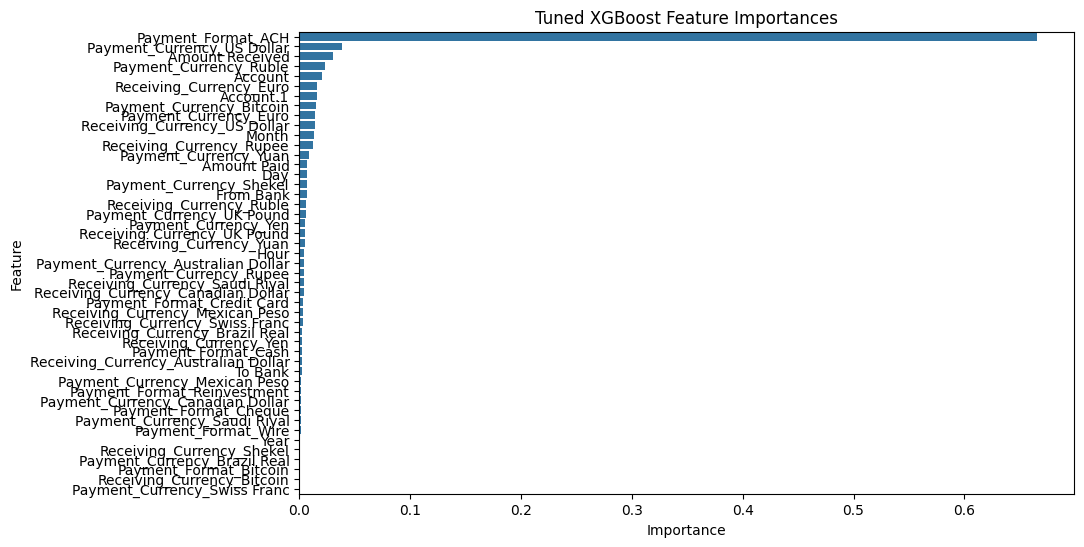

In [ ]:
feature_importances = best_xgboost.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Tuned XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

####Tuned AdaBoost Model

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME'}
Best hyperparameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuned AdaBoost - Accuracy: 0.936778242055644
Tuned AdaBoost - Precision: 0.4393924269647967
Tuned AdaBoost - Recall: 0.7496735736588135
Tuned AdaBoost - F1 Score: 0.5540498017579559
Tuned AdaBoost - FPR: 0.05287794620719957
Tuned AdaBoost - TPR: 0.7496735736588135
Tuned AdaBoost - FNR: 0.2503264263411865
Tuned AdaBoost - TNR: 0.9471220537928005
Tuned AdaBoost - Youden's J: 0.6967956274516139


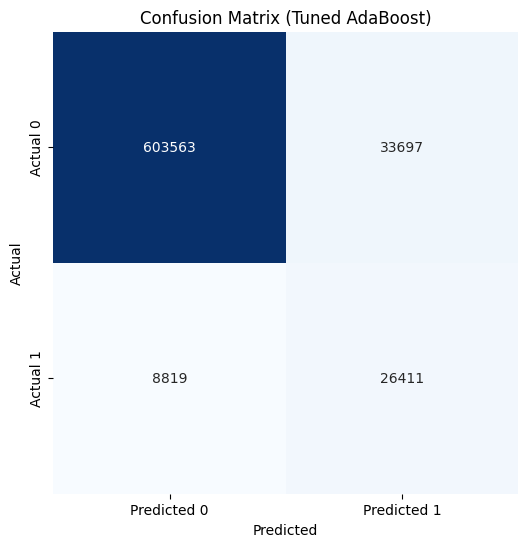

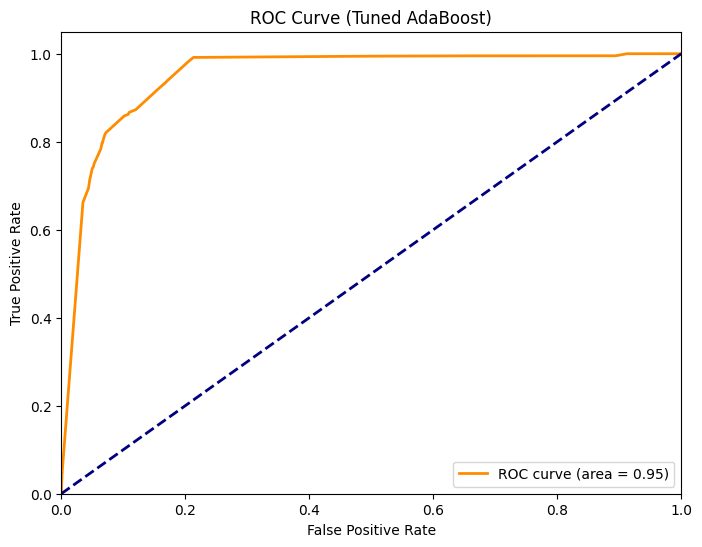

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distribution_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

random_search_ada = RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=param_distribution_ada, n_iter=15, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

random_search_ada.fit(X_train, y_train)

best_params_ada = random_search_ada.best_params_
print(f"Best hyperparameters for AdaBoost: {best_params_ada}")

best_params_ada = random_search_ada.best_params_
print(f"Best hyperparameters for AdaBoost: {best_params_ada}")

best_adaBoost = AdaBoostClassifier(**best_params_ada)
best_adaBoost.fit(X_train, y_train)
y_pred_ada_tuned = best_adaBoost.predict(X_test)
y_prob_ada_tuned = best_adaBoost.predict_proba(X_test)[:, 1]

accuracy_ada_tuned = accuracy_score(y_test, y_pred_ada_tuned)
precision_ada_tuned = precision_score(y_test, y_pred_ada_tuned)
recall_ada_tuned = recall_score(y_test, y_pred_ada_tuned)
f1_ada_tuned = f1_score(y_test, y_pred_ada_tuned)

conf_matrix_ada_tuned = confusion_matrix(y_test, y_pred_ada_tuned)
TN_ada_tuned = conf_matrix_ada_tuned[0, 0]
FP_ada_tuned = conf_matrix_ada_tuned[0, 1]
FN_ada_tuned = conf_matrix_ada_tuned[1, 0]
TP_ada_tuned = conf_matrix_ada_tuned[1, 1]

FPR_ada_tuned = FP_ada_tuned / (FP_ada_tuned + TN_ada_tuned) if (FP_ada_tuned + TN_ada_tuned) != 0 else 0
TPR_ada_tuned = TP_ada_tuned / (TP_ada_tuned + FN_ada_tuned) if (TP_ada_tuned + FN_ada_tuned) != 0 else 0
FNR_ada_tuned = FN_ada_tuned / (FN_ada_tuned + TP_ada_tuned) if (FN_ada_tuned + TP_ada_tuned) != 0 else 0
TNR_ada_tuned = TN_ada_tuned / (TN_ada_tuned + FP_ada_tuned) if (TN_ada_tuned + FP_ada_tuned) != 0 else 0

youden_j_ada_tuned = TPR_ada_tuned - FPR_ada_tuned

fpr_ada_tuned, tpr_ada_tuned, thresholds_ada_tuned = roc_curve(y_test, y_prob_ada_tuned)
roc_auc_ada_tuned = auc(fpr_ada_tuned, tpr_ada_tuned)

print(f"Tuned AdaBoost - Accuracy: {accuracy_ada_tuned}")
print(f"Tuned AdaBoost - Precision: {precision_ada_tuned}")
print(f"Tuned AdaBoost - Recall: {recall_ada_tuned}")
print(f"Tuned AdaBoost - F1 Score: {f1_ada_tuned}")
print(f"Tuned AdaBoost - FPR: {FPR_ada_tuned}")
print(f"Tuned AdaBoost - TPR: {TPR_ada_tuned}")
print(f"Tuned AdaBoost - FNR: {FNR_ada_tuned}")
print(f"Tuned AdaBoost - TNR: {TNR_ada_tuned}")
print(f"Tuned AdaBoost - Youden's J: {youden_j_ada_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_ada_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada_tuned, tpr_ada_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned AdaBoost)')
plt.legend(loc="lower right")
plt.show()

Tuned AdaBoost Validation - Accuracy: 0.9279590973743898
Tuned AdaBoost Validation - Precision: 0.22625090645395213
Tuned AdaBoost Validation - Recall: 0.7834653274096968
Tuned AdaBoost Validation - F1 Score: 0.3511080332409972
Tuned AdaBoost Validation - FPR: 0.06835462999009496
Tuned AdaBoost Validation - TPR: 0.7834653274096968
Tuned AdaBoost Validation - FNR: 0.21653467259030326
Tuned AdaBoost Validation - TNR: 0.931645370009905
Tuned AdaBoost Validation - Youden's J: 0.7151106974196018


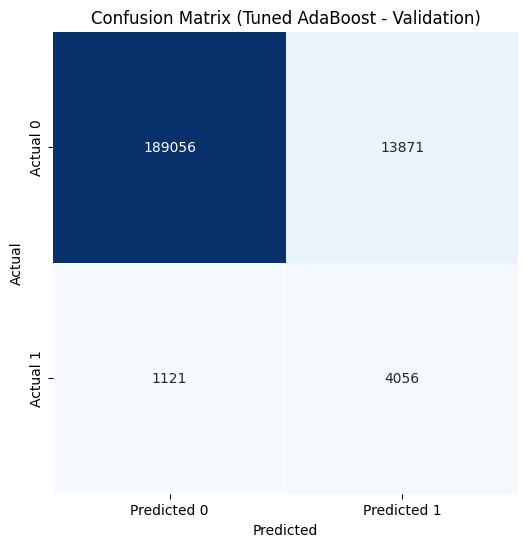

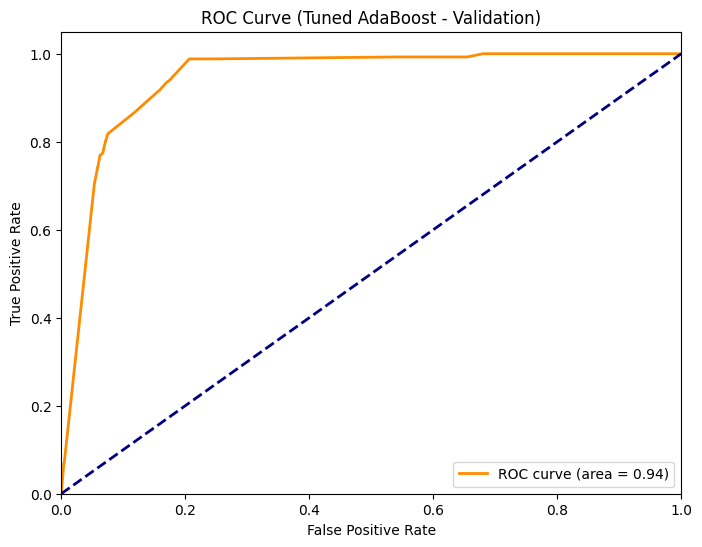

In [ ]:
y_pred_ada_tuned_val = best_adaBoost.predict(X_val)
y_prob_ada_tuned_val = best_adaBoost.predict_proba(X_val)[:, 1]

accuracy_ada_tuned_val = accuracy_score(y_val, y_pred_ada_tuned_val)
precision_ada_tuned_val = precision_score(y_val, y_pred_ada_tuned_val)
recall_ada_tuned_val = recall_score(y_val, y_pred_ada_tuned_val)
f1_ada_tuned_val = f1_score(y_val, y_pred_ada_tuned_val)

conf_matrix_ada_tuned_val = confusion_matrix(y_val, y_pred_ada_tuned_val)
TN_ada_tuned_val = conf_matrix_ada_tuned_val[0, 0]
FP_ada_tuned_val = conf_matrix_ada_tuned_val[0, 1]
FN_ada_tuned_val = conf_matrix_ada_tuned_val[1, 0]
TP_ada_tuned_val = conf_matrix_ada_tuned_val[1, 1]

FPR_ada_tuned_val = FP_ada_tuned_val / (FP_ada_tuned_val + TN_ada_tuned_val) if (FP_ada_tuned_val + TN_ada_tuned_val) != 0 else 0
TPR_ada_tuned_val = TP_ada_tuned_val / (TP_ada_tuned_val + FN_ada_tuned_val) if (TP_ada_tuned_val + FN_ada_tuned_val) != 0 else 0
FNR_ada_tuned_val = FN_ada_tuned_val / (FN_ada_tuned_val + TP_ada_tuned_val) if (FN_ada_tuned_val + TP_ada_tuned_val) != 0 else 0
TNR_ada_tuned_val = TN_ada_tuned_val / (TN_ada_tuned_val + FP_ada_tuned_val) if (TN_ada_tuned_val + FP_ada_tuned_val) != 0 else 0

youden_j_ada_tuned_val = TPR_ada_tuned_val - FPR_ada_tuned_val

fpr_ada_tuned_val, tpr_ada_tuned_val, thresholds_ada_tuned_val = roc_curve(y_val, y_prob_ada_tuned_val)
roc_auc_ada_tuned_val = auc(fpr_ada_tuned_val, tpr_ada_tuned_val)

print(f"Tuned AdaBoost Validation - Accuracy: {accuracy_ada_tuned_val}")
print(f"Tuned AdaBoost Validation - Precision: {precision_ada_tuned_val}")
print(f"Tuned AdaBoost Validation - Recall: {recall_ada_tuned_val}")
print(f"Tuned AdaBoost Validation - F1 Score: {f1_ada_tuned_val}")
print(f"Tuned AdaBoost Validation - FPR: {FPR_ada_tuned_val}")
print(f"Tuned AdaBoost Validation - TPR: {TPR_ada_tuned_val}")
print(f"Tuned AdaBoost Validation - FNR: {FNR_ada_tuned_val}")
print(f"Tuned AdaBoost Validation - TNR: {TNR_ada_tuned_val}")
print(f"Tuned AdaBoost Validation - Youden's J: {youden_j_ada_tuned_val}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_ada_tuned_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned AdaBoost - Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada_tuned_val, tpr_ada_tuned_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada_tuned_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned AdaBoost - Validation)')
plt.legend(loc="lower right")
plt.show()

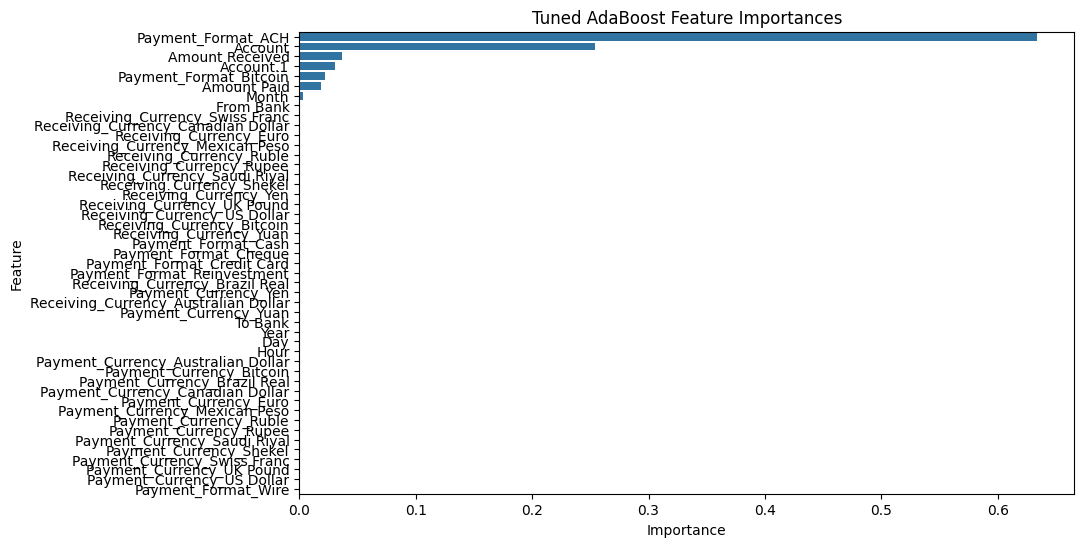

In [ ]:
feature_importances = best_adaBoost.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Tuned AdaBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###Best Parameters after tuning

####Naive Bayes

In [ ]:
print(f"Best score for Naive Bayes: {grid_search_nb.best_score_}")
print(f"Best estimators for Naive Bayes: {grid_search_nb.best_estimator_}")
print(f"Best parameters for Naive Bayes: {grid_search_nb.best_params_}")

Best score for Naive Bayes: 0.8414655671297389
Best estimators for Naive Bayes: GaussianNB(var_smoothing=0.043287612810830566)
Best parameters for Naive Bayes: {'var_smoothing': 0.043287612810830566}


####Decision Tree

In [ ]:
print(f"Best score for Decision Tree: {grid_search_dt.best_score_}")
print(f"Best estimators for Decision Tree: {grid_search_dt.best_estimator_}")
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

Best score for Decision Tree: 0.9093974652099035
Best estimators for Decision Tree: DecisionTreeClassifier(max_depth=10, min_samples_split=5)
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


####Random Forest

In [ ]:
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")
print(f"Best estimators for Random Forest: {grid_search_rf.best_estimator_}")
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

Best score for Random Forest: 0.919036317721293
Best estimators for Random Forest: RandomForestClassifier(min_samples_leaf=2, n_estimators=50, n_jobs=-1,
                       random_state=42)
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


####Gradient Boost

In [ ]:
print(f"Best score for Gradient Boosting: {random_search_gb.best_score_}")
print(f"Best estimators for Gradient Boosting: {random_search_gb.best_estimator_}")
print(f"Best parameters for Gradient Boosting: {random_search_gb.best_params_}")

Best score for Gradient Boosting: 0.9145301694481736
Best estimators for Gradient Boosting: GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                           n_estimators=50)
Best parameters for Gradient Boosting: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.2}


####XGBoost

In [ ]:
print(f"Best score for XGBoost: {random_search_xgb.best_score_}")
print(f"Best estimators for XGBoost: {random_search_xgb.best_estimator_}")
print(f"Best parameters for XGBoost: {random_search_xgb.best_params_}")

Best score for XGBoost: 0.9148902064579911
Best estimators for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Best parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.5, 'colsample_bytree': 0.8}


####AdaBoost

In [ ]:
print(f"Best score for AdaBoost: {random_search_ada.best_score_}")
print(f"Best estimators for AdaBoost: {random_search_ada.best_estimator_}")
print(f"Best parameters for AdaBoost: {random_search_ada.best_params_}")

Best score for AdaBoost: 0.897267163282933
Best estimators for AdaBoost: AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=100)
Best parameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME'}
